# Imports

In [2]:
%load_ext autoreload
%autoreload 2
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [16]:
from deepagri.data_full import get_df_full
from deepagri.model import *
from deepagri.data_pred import get_X_pred
from deepagri.data_region_ohe import ohe_regions
from sklearn.metrics import mean_absolute_error
from sklearn import set_config; set_config(display='diagram')
import matplotlib.pyplot as plt
import seaborn as sns

# Modèle XGBoost

## Modèle avec toutes les features

In [594]:
full_df=get_df_full(agg_type='M')

/Users/constantintalandier/code/Constantier/deepagri/deepagri/meteo_agg.py:127: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  df_agg.loc[:, idx[:,cols_to_shift]] = (df_agg.loc[:, idx[:,cols_to_shift]]
/Users/constantintalandier/code/Constantier/deepagri/deepagri/meteo_agg.py:127: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  df_agg.loc[:, idx[:,cols_to_shift]] = (df_agg.loc[:, idx[:,cols_to_shift]]
/Users/constantintalandier/.pyenv/ve

In [595]:
full_df

,Agriculteur,rendement,RatioSep,RatioOct,Prix_matos,Rend_n-1,tmax_c 01,tmax_c 02,tmax_c 03,tmax_c 04,...,dpt_86,dpt_87,dpt_88,dpt_89,dpt_9,dpt_90,dpt_91,dpt_93,dpt_94,dpt_95
2010-1,2820.041792,71.964054,1.229426,1.255319,92.741667,69.712601,7.0,5.0,7.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2010-2,3563.698886,83.68559,1.229426,1.255319,92.741667,89.977942,4.0,6.0,7.0,6.0,...,0,0,0,0,0,0,0,0,0,0
2010-3,4276.654443,65.0,1.229426,1.255319,92.741667,68.0,6.0,5.0,9.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2010-4,1462.803043,33.0,1.229426,1.255319,92.741667,35.0,3.0,6.0,6.0,8.0,...,0,0,0,0,0,0,0,0,0,0
2010-5,1406.337173,41.0,1.229426,1.255319,92.741667,41.0,3.0,5.0,4.0,6.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-91,422.282609,81.0,1.104197,1.072703,89.891667,72.0,6.0,4.0,4.0,4.0,...,0,0,0,0,0,0,1,0,0,0
2021-93,80.734902,83.0,1.104197,1.072703,89.891667,78.0,14.0,6.0,8.0,14.0,...,0,0,0,0,0,0,0,1,0,0
2021-94,65.237675,81.0,1.104197,1.072703,89.891667,72.0,5.0,4.0,4.0,4.0,...,0,0,0,0,0,0,0,0,1,0
2021-95,213.709486,83.0,1.104197,1.072703,89.891667,78.0,8.0,5.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0,1


In [596]:
X_test=full_df.iloc[-93:].drop(columns=['rendement'])
#X_test=full_df.iloc[-93:][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_test=full_df.iloc[-93:]['rendement']
X_train=full_df.iloc[:-93].drop(columns=['rendement'])
#X_train=full_df.iloc[:-93][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_train=full_df.iloc[:-93]['rendement']

In [597]:
model=build_model(model=None)#None: renvoi un XGboost
model=fit_model(model,X_train,y_train)

In [598]:
ypred=model.predict(X_test)

In [599]:
mean_absolute_error(y_test,ypred)

8.500970455077615

## Modèle avec juste OHE

In [178]:
df_ohe=full_df.iloc[:,124:]
df_ohe['Production']=full_df['Production']

In [179]:
X_test=df_ohe.iloc[-93:].drop(columns=['Production'])
#X_test=df_ohe.iloc[-93:][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_test=df_ohe.iloc[-93:]['Production']
X_train=df_ohe.iloc[:-93].drop(columns=['Production'])
#X_train=df_ohe.iloc[:-93][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_train=df_ohe.iloc[:-93]['Production']

In [180]:
model=build_model()
model=fit_model(model,X_train,y_train)

In [181]:
ypred=model.predict(X_test)

In [182]:
mean_absolute_error(y_test,ypred)

70474.02306787635

Score de **70474** juste avec le OHE

# Modèle avec un LinearRegressor

## Modèle avec toutes les features

In [192]:
X_test=full_df.iloc[-93:].drop(columns=['Production'])
#X_test=full_df.iloc[-93:][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_test=full_df.iloc[-93:]['Production']
X_train=full_df.iloc[:-93].drop(columns=['Production'])
#X_train=full_df.iloc[:-93][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_train=full_df.iloc[:-93]['Production']

In [193]:
model=build_model(model='linear_reg')
model=fit_model(model,X_train,y_train)

In [194]:
ypred=model.predict(X_test)
mean_absolute_error(y_test,ypred)

65564.64772331061

Score meilleur qu'avec le XGBoost

## Modèle avec juste OHE

In [202]:
df_ohe=full_df.iloc[:,124:]
df_ohe['Production']=full_df['Production']

In [196]:
X_test=df_ohe.iloc[-93:].drop(columns=['Production'])
#X_test=df_ohe.iloc[-93:][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_test=df_ohe.iloc[-93:]['Production']
X_train=df_ohe.iloc[:-93].drop(columns=['Production'])
#X_train=df_ohe.iloc[:-93][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_train=df_ohe.iloc[:-93]['Production']

In [197]:
model=build_model(model='linear_reg')
model=fit_model(model,X_train,y_train)

In [198]:
ypred=model.predict(X_test)
mean_absolute_error(y_test,ypred)

22110.467644183747

Très bon score par rapport à avec toutes les features

# Finding best features

## Avec un maintient des features qui améliorent

In [223]:
df_ohe=full_df.iloc[:,124:] #Reset du df_ohe
df_ohe['Production']=full_df['Production']

In [224]:
best_score=22110
for name in full_df.columns:
    print('Test de ' + name)
    if name in df_ohe.columns:
        pass
    else :
        df_ohe[name]=full_df[name]
        
        X=df_ohe[:-93].drop(columns=['Production'])
        X_test=df_ohe.iloc[-93:].drop(columns=['Production'])
        y=df_ohe[:-93]['Production']
        y_test=df_ohe.iloc[-93:]['Production']
        
        model=build_model(model='linear_reg')
        model=fit_model(model,X,y)
        score_pred=mean_absolute_error(y_test,model.predict(X_test))
        if score_pred<best_score:
            best_score=score_pred
            print(best_score,name)
        else :
            df_ohe=df_ohe.drop(columns=[name])

Test de Agriculteur
Test de Production
Test de RatioSep
22083.504102819847 RatioSep
Test de RatioOct
Test de Prix_matos
Test de Prod_n-1
Test de tmax_c 01
Test de tmax_c 02
Test de tmax_c 03
Test de tmax_c 04
Test de tmax_c 05
Test de tmax_c 09_n-1
22063.724038757307 tmax_c 09_n-1
Test de tmax_c 10_n-1
Test de tmax_c 11_n-1
Test de tmax_c 12_n-1
Test de tmin_c 01
Test de tmin_c 02
Test de tmin_c 03
Test de tmin_c 04
Test de tmin_c 05
Test de tmin_c 09_n-1
Test de tmin_c 10_n-1
Test de tmin_c 11_n-1
22045.959126394886 tmin_c 11_n-1
Test de tmin_c 12_n-1
Test de windspeed_max 01
Test de windspeed_max 02
Test de windspeed_max 03
Test de windspeed_max 04
Test de windspeed_max 05
Test de windspeed_max 09_n-1
Test de windspeed_max 10_n-1
Test de windspeed_max 11_n-1
Test de windspeed_max 12_n-1
Test de rain_mm 01
Test de rain_mm 02
Test de rain_mm 03
Test de rain_mm 04
Test de rain_mm 05
Test de rain_mm 09_n-1
Test de rain_mm 10_n-1
Test de rain_mm 11_n-1
Test de rain_mm 12_n-1
Test de humid

In [225]:
best_score

21820.414711512556

Petite amélioration du score en gardant les features suivantes (Production sert pour construire le y):

In [226]:
best_features=list(df_ohe.columns)

In [227]:
best_features

['dpt_10',
 'dpt_11',
 'dpt_12',
 'dpt_13',
 'dpt_14',
 'dpt_15',
 'dpt_16',
 'dpt_17',
 'dpt_18',
 'dpt_19',
 'dpt_2',
 'dpt_20',
 'dpt_21',
 'dpt_22',
 'dpt_23',
 'dpt_24',
 'dpt_25',
 'dpt_26',
 'dpt_27',
 'dpt_28',
 'dpt_29',
 'dpt_3',
 'dpt_30',
 'dpt_31',
 'dpt_32',
 'dpt_33',
 'dpt_34',
 'dpt_35',
 'dpt_36',
 'dpt_37',
 'dpt_38',
 'dpt_39',
 'dpt_4',
 'dpt_40',
 'dpt_41',
 'dpt_42',
 'dpt_43',
 'dpt_44',
 'dpt_45',
 'dpt_46',
 'dpt_47',
 'dpt_48',
 'dpt_49',
 'dpt_5',
 'dpt_50',
 'dpt_51',
 'dpt_52',
 'dpt_53',
 'dpt_54',
 'dpt_55',
 'dpt_56',
 'dpt_57',
 'dpt_58',
 'dpt_59',
 'dpt_6',
 'dpt_60',
 'dpt_61',
 'dpt_62',
 'dpt_63',
 'dpt_64',
 'dpt_65',
 'dpt_66',
 'dpt_67',
 'dpt_68',
 'dpt_69',
 'dpt_7',
 'dpt_70',
 'dpt_71',
 'dpt_72',
 'dpt_73',
 'dpt_74',
 'dpt_76',
 'dpt_77',
 'dpt_78',
 'dpt_79',
 'dpt_8',
 'dpt_80',
 'dpt_81',
 'dpt_82',
 'dpt_83',
 'dpt_84',
 'dpt_85',
 'dpt_86',
 'dpt_87',
 'dpt_88',
 'dpt_89',
 'dpt_9',
 'dpt_90',
 'dpt_91',
 'dpt_93',
 'dpt_94',
 'dpt_9

## Sans maintient des features

In [210]:
df_ohe=full_df.iloc[:,124:]
df_ohe['Production']=full_df['Production']

In [211]:
best_score=22110
features=[]
for name in full_df.columns:
    print('Test de ' + name)
    if name in df_ohe.columns:
        pass
    else :
        df_ohe[name]=full_df[name]
        
        X=df_ohe[:-93].drop(columns=['Production'])
        X_test=df_ohe.iloc[-93:].drop(columns=['Production'])
        y=df_ohe[:-93]['Production']
        y_test=df_ohe.iloc[-93:]['Production']
        
        model=build_model(model='linear_reg')
        model=fit_model(model,X,y)
        score_pred=mean_absolute_error(y_test,model.predict(X_test))
        if score_pred<best_score:
            best_score=score_pred
            print(best_score,name)
            features.append(name)
        df_ohe=df_ohe.drop(columns=[name])

Test de Agriculteur
Test de Production
Test de RatioSep
22083.504102819847 RatioSep
Test de RatioOct
Test de Prix_matos
Test de Prod_n-1
Test de tmax_c 01
Test de tmax_c 02
Test de tmax_c 03
Test de tmax_c 04
Test de tmax_c 05
Test de tmax_c 09_n-1
Test de tmax_c 10_n-1
Test de tmax_c 11_n-1
Test de tmax_c 12_n-1
Test de tmin_c 01
Test de tmin_c 02
Test de tmin_c 03
Test de tmin_c 04
Test de tmin_c 05
Test de tmin_c 09_n-1
Test de tmin_c 10_n-1
Test de tmin_c 11_n-1
Test de tmin_c 12_n-1
Test de windspeed_max 01
Test de windspeed_max 02
Test de windspeed_max 03
Test de windspeed_max 04
Test de windspeed_max 05
Test de windspeed_max 09_n-1
Test de windspeed_max 10_n-1
Test de windspeed_max 11_n-1
Test de windspeed_max 12_n-1
Test de rain_mm 01
Test de rain_mm 02
Test de rain_mm 03
Test de rain_mm 04
Test de rain_mm 05
Test de rain_mm 09_n-1
Test de rain_mm 10_n-1
Test de rain_mm 11_n-1
Test de rain_mm 12_n-1
Test de humidity_pct 01
Test de humidity_pct 02
Test de humidity_pct 03
Test de

On garde donc :

In [212]:
features

['RatioSep', 'pressuremax_mb 02', 'pressuremax_mb 10_n-1', 'tmax_deg 02']

Reconstrution du df avec toutes les features selectionnées:

In [219]:
df_ohe=pd.concat([df_ohe,full_df[features]],axis=1)

In [220]:
X_test=df_ohe.iloc[-93:].drop(columns=['Production'])
#X_test=df_ohe.iloc[-93:][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_test=df_ohe.iloc[-93:]['Production']
X_train=df_ohe.iloc[:-93].drop(columns=['Production'])
#X_train=df_ohe.iloc[:-93][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_train=df_ohe.iloc[:-93]['Production']

In [221]:
model=build_model(model='linear_reg')
model=fit_model(model,X_train,y_train)

In [222]:
ypred=model.predict(X_test)
mean_absolute_error(y_test,ypred)

22290.917601779896

Pas d'amélioration

# Stacking

## Avec toutes les features

In [239]:
from sklearn.ensemble import StackingRegressor

In [349]:
ensemble = StackingRegressor(
    estimators = [
                ("LineReg", LinearRegression()),
                  ("XGB", XGBRegressor())],
    final_estimator = LinearRegression())
pipe=Pipeline([('Scaler',RobustScaler()),
     ('Stacking',ensemble)])

In [350]:
X_test=full_df.iloc[-93:].drop(columns=['Production'])
#X_test=full_df.iloc[-93:][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_test=full_df.iloc[-93:]['Production']
X_train=full_df.iloc[:-93].drop(columns=['Production'])
#X_train=full_df.iloc[:-93][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_train=full_df.iloc[:-93]['Production']

In [351]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('Scaler', RobustScaler()),
                ('Stacking',
                 StackingRegressor(estimators=[('LineReg', LinearRegression()),
                                               ('XGB',
                                                XGBRegressor(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             enable_categorical=False,
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=None,
                                                             scale_pos_weight=None,
                                                             subsample=None,
                                                             tree_method=None,
                                                             validate_parameters=None,
                                                             verbosity=None))],
                                   final_estimator=LinearRegression()))])

In [352]:
mean_absolute_error(y_test,pipe.predict(X_test))

53336.32355497118

In [282]:
best_features

['dpt_10',
 'dpt_11',
 'dpt_12',
 'dpt_13',
 'dpt_14',
 'dpt_15',
 'dpt_16',
 'dpt_17',
 'dpt_18',
 'dpt_19',
 'dpt_2',
 'dpt_20',
 'dpt_21',
 'dpt_22',
 'dpt_23',
 'dpt_24',
 'dpt_25',
 'dpt_26',
 'dpt_27',
 'dpt_28',
 'dpt_29',
 'dpt_3',
 'dpt_30',
 'dpt_31',
 'dpt_32',
 'dpt_33',
 'dpt_34',
 'dpt_35',
 'dpt_36',
 'dpt_37',
 'dpt_38',
 'dpt_39',
 'dpt_4',
 'dpt_40',
 'dpt_41',
 'dpt_42',
 'dpt_43',
 'dpt_44',
 'dpt_45',
 'dpt_46',
 'dpt_47',
 'dpt_48',
 'dpt_49',
 'dpt_5',
 'dpt_50',
 'dpt_51',
 'dpt_52',
 'dpt_53',
 'dpt_54',
 'dpt_55',
 'dpt_56',
 'dpt_57',
 'dpt_58',
 'dpt_59',
 'dpt_6',
 'dpt_60',
 'dpt_61',
 'dpt_62',
 'dpt_63',
 'dpt_64',
 'dpt_65',
 'dpt_66',
 'dpt_67',
 'dpt_68',
 'dpt_69',
 'dpt_7',
 'dpt_70',
 'dpt_71',
 'dpt_72',
 'dpt_73',
 'dpt_74',
 'dpt_76',
 'dpt_77',
 'dpt_78',
 'dpt_79',
 'dpt_8',
 'dpt_80',
 'dpt_81',
 'dpt_82',
 'dpt_83',
 'dpt_84',
 'dpt_85',
 'dpt_86',
 'dpt_87',
 'dpt_88',
 'dpt_89',
 'dpt_9',
 'dpt_90',
 'dpt_91',
 'dpt_93',
 'dpt_94',
 'dpt_9

## Avec juste les best features

In [287]:
ensemble = StackingRegressor(
    estimators = [
                ("Line", LinearRegression()),
                  ("XGB", XGBRegressor())],
    final_estimator = LinearRegression())
pipe=Pipeline([('Scaler',RobustScaler()),
     ('Stacking',ensemble)])

In [288]:
X_test=full_df[best_features].iloc[-93:].drop(columns=['Production'])
#X_test=full_df[best_features].iloc[-93:][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_test=full_df[best_features].iloc[-93:]['Production']
X_train=full_df[best_features].iloc[:-93].drop(columns=['Production'])
#X_train=full_df[best_features].iloc[:-93][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_train=full_df[best_features].iloc[:-93]['Production']

In [289]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Scaler', RobustScaler()),
                ('Stacking',
                 StackingRegressor(estimators=[('Line', LinearRegression()),
                                               ('XGB',
                                                XGBRegressor(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             enable_categorical=False,
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=None,
                                                             scale_pos_weight=None,
                                                             subsample=None,
                                                             tree_method=None,
                                                             validate_parameters=None,
                                                             verbosity=None))],
                                   final_estimator=LinearRegression()))])

In [290]:
mean_absolute_error(y_test,pipe.predict(X_test))

23091.814148154685

## Juste OHE

In [514]:
df_ohe=full_df.iloc[:,124:]
df_ohe['Production']=full_df['Production']

In [515]:
ensemble = StackingRegressor(
    estimators = [
                ("Line", LinearRegression()),
                  ("XGB", XGBRegressor())],
    final_estimator = LinearRegression())
pipe=Pipeline([('Scaler',RobustScaler()),
     ('Stacking',ensemble)])

In [516]:
X_test=df_ohe.iloc[-93:].drop(columns=['Production'])
#X_test=df_ohe.iloc[-93:][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_test=df_ohe.iloc[-93:]['Production']
X_train=df_ohe.iloc[:-93].drop(columns=['Production'])
#X_train=df_ohe.iloc[:-93][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_train=df_ohe.iloc[:-93]['Production']

In [517]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Scaler', RobustScaler()),
                ('Stacking',
                 StackingRegressor(estimators=[('Line', LinearRegression()),
                                               ('XGB',
                                                XGBRegressor(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             enable_categorical=False,
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=None,
                                                             scale_pos_weight=None,
                                                             subsample=None,
                                                             tree_method=None,
                                                             validate_parameters=None,
                                                             verbosity=None))],
                                   final_estimator=LinearRegression()))])

In [518]:
mean_absolute_error(y_test,pipe.predict(X_test))

22163.81271399624

# Rerun best features finding with stacking

In [519]:
df_ohe=full_df.iloc[:,124:] #Reset du df_ohe
df_ohe['Production']=full_df['Production']

In [520]:
best_score=22163.81271399624
for name in full_df.columns:
    print('Test de ' + name)
    if name in df_ohe.columns:
        pass
    else :
        df_ohe[name]=full_df[name]
        
        X=df_ohe[:-93].drop(columns=['Production'])
        X_test=df_ohe.iloc[-93:].drop(columns=['Production'])
        y=df_ohe[:-93]['Production']
        y_test=df_ohe.iloc[-93:]['Production']
        
        
        ensemble = StackingRegressor(
            estimators = [
                        ("LineReg", LinearRegression()),
                          ("XGB", XGBRegressor())],
            final_estimator = LinearRegression())
        pipe=Pipeline([('Scaler',RobustScaler()),
             ('Stacking',ensemble)])
        pipe.fit(X,y)
        score_pred=mean_absolute_error(y_test,pipe.predict(X_test))
        if score_pred<best_score:
            best_score=score_pred
            print(best_score,name)
        else :
            df_ohe=df_ohe.drop(columns=[name])

Test de Agriculteur
Test de Production
Test de RatioSep
Test de RatioOct
Test de Prix_matos
Test de Prod_n-1
Test de tmax_c 01
Test de tmax_c 02
Test de tmax_c 03
Test de tmax_c 04
Test de tmax_c 05
Test de tmax_c 09_n-1
Test de tmax_c 10_n-1
22100.966097696222 tmax_c 10_n-1
Test de tmax_c 11_n-1
Test de tmax_c 12_n-1
Test de tmin_c 01
Test de tmin_c 02
Test de tmin_c 03
Test de tmin_c 04
Test de tmin_c 05
22024.561079978906 tmin_c 05
Test de tmin_c 09_n-1
Test de tmin_c 10_n-1
Test de tmin_c 11_n-1
Test de tmin_c 12_n-1
Test de windspeed_max 01
Test de windspeed_max 02
Test de windspeed_max 03
Test de windspeed_max 04
Test de windspeed_max 05
Test de windspeed_max 09_n-1
Test de windspeed_max 10_n-1
Test de windspeed_max 11_n-1
Test de windspeed_max 12_n-1
Test de rain_mm 01
Test de rain_mm 02
Test de rain_mm 03
Test de rain_mm 04
Test de rain_mm 05
Test de rain_mm 09_n-1
Test de rain_mm 10_n-1
Test de rain_mm 11_n-1
Test de rain_mm 12_n-1
Test de humidity_pct 01
Test de humidity_pct 

In [522]:
best_score

21162.189256972237

In [523]:
list(df_ohe.columns)

['dpt_10',
 'dpt_11',
 'dpt_12',
 'dpt_13',
 'dpt_14',
 'dpt_15',
 'dpt_16',
 'dpt_17',
 'dpt_18',
 'dpt_19',
 'dpt_2',
 'dpt_20',
 'dpt_21',
 'dpt_22',
 'dpt_23',
 'dpt_24',
 'dpt_25',
 'dpt_26',
 'dpt_27',
 'dpt_28',
 'dpt_29',
 'dpt_3',
 'dpt_30',
 'dpt_31',
 'dpt_32',
 'dpt_33',
 'dpt_34',
 'dpt_35',
 'dpt_36',
 'dpt_37',
 'dpt_38',
 'dpt_39',
 'dpt_4',
 'dpt_40',
 'dpt_41',
 'dpt_42',
 'dpt_43',
 'dpt_44',
 'dpt_45',
 'dpt_46',
 'dpt_47',
 'dpt_48',
 'dpt_49',
 'dpt_5',
 'dpt_50',
 'dpt_51',
 'dpt_52',
 'dpt_53',
 'dpt_54',
 'dpt_55',
 'dpt_56',
 'dpt_57',
 'dpt_58',
 'dpt_59',
 'dpt_6',
 'dpt_60',
 'dpt_61',
 'dpt_62',
 'dpt_63',
 'dpt_64',
 'dpt_65',
 'dpt_66',
 'dpt_67',
 'dpt_68',
 'dpt_69',
 'dpt_7',
 'dpt_70',
 'dpt_71',
 'dpt_72',
 'dpt_73',
 'dpt_74',
 'dpt_76',
 'dpt_77',
 'dpt_78',
 'dpt_79',
 'dpt_8',
 'dpt_80',
 'dpt_81',
 'dpt_82',
 'dpt_83',
 'dpt_84',
 'dpt_85',
 'dpt_86',
 'dpt_87',
 'dpt_88',
 'dpt_89',
 'dpt_9',
 'dpt_90',
 'dpt_91',
 'dpt_93',
 'dpt_94',
 'dpt_9

In [524]:
X_pred=X_pred[df_ohe.drop(columns=['Production']).columns]

In [525]:
X=df_ohe[:-93].drop(columns=['Production'])
X_test=df_ohe.iloc[-93:].drop(columns=['Production'])
y=df_ohe[:-93]['Production']
y_test=df_ohe.iloc[-93:]['Production']

In [526]:
pipe.fit(X,y)

Pipeline(steps=[('Scaler', RobustScaler()),
                ('Stacking',
                 StackingRegressor(estimators=[('LineReg', LinearRegression()),
                                               ('XGB',
                                                XGBRegressor(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             enable_categorical=False,
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=None,
                                                             scale_pos_weight=None,
                                                             subsample=None,
                                                             tree_method=None,
                                                             validate_parameters=None,
                                                             verbosity=None))],
                                   final_estimator=LinearRegression()))])

In [527]:
X_pred

,dpt_10,dpt_11,dpt_12,dpt_13,dpt_14,dpt_15,dpt_16,dpt_17,dpt_18,dpt_19,...,dpt_91,dpt_93,dpt_94,dpt_95,tmax_c 10_n-1,tmin_c 05,pressuremax_mb 10_n-1,snow_mm 04,snow_mm 05,snow_mm 11_n-1
2022-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7.0,26.0,1018.290323,4.4,0.0,0.0
2022-10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.0,29.0,1016.129032,0.7,0.0,0.0
2022-11,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,3.0,25.0,1018.774194,0.0,0.0,0.0
2022-12,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,5.0,26.0,1018.806452,0.1,0.0,0.0
2022-13,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,8.0,26.0,1017.193548,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.0,26.0,1017.838710,13.9,0.0,0.1
2022-91,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,5.0,24.0,1015.225806,0.3,0.0,0.0
2022-93,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,8.0,54.0,1016.903226,0.0,0.0,0.0
2022-94,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,5.0,26.0,1015.000000,0.7,0.0,0.0


In [561]:
pred_2022=pd.DataFrame(pipe.predict(X_pred),index=X_pred.index.str[5:])
pred_2015=pd.DataFrame(pipe.predict(df_2015[df_ohe.drop(columns=['Production']).columns]),index=df_2015.index.str[5:])
pred_2016=pd.DataFrame(pipe.predict(df_2016[df_ohe.drop(columns=['Production']).columns]),index=df_2016.index.str[5:])

pred_2022=pred_2022.rename(columns={0:'2022'})
pred_2015=pred_2015.rename(columns={0:'2015'})
pred_2016=pred_2016.rename(columns={0:'2016'})

In [562]:
pred_comp=pred_2022

In [563]:
pred_comp=pred_comp.merge(pred_2015,left_index=True,right_index=True)
pred_comp=pred_comp.merge(pred_2016,left_index=True,right_index=True)

In [566]:
pred_comp.tail(20)

,2022,2015,2016
77,1.044876e+06,1.045359e+06,1.110741e+06
78,2.649569e+05,2.698061e+05,2.712477e+05
79,6.568331e+05,6.495921e+05,6.639420e+05
8,4.946913e+05,4.991734e+05,5.052960e+05
80,1.663322e+06,1.646083e+06,1.702770e+06
81,2.136837e+05,2.205049e+05,2.239874e+05
82,2.219188e+05,2.195720e+05,2.263666e+05
83,1.376461e+04,1.359094e+04,2.394708e+04
84,1.077197e+03,1.012506e+04,8.295407e+03
85,5.144902e+05,5.045422e+05,5.026296e+05


In [569]:
df_2015['Production'].tail(20)

2015-76    1140150.0
2015-77    1261975.5
2015-78     325771.5
2015-79     762900.0
2015-80    2006548.2
2015-81     242453.0
2015-82     253575.0
2015-83       1211.0
2015-84       9885.6
2015-85     603367.2
2015-86     951896.0
2015-87      80100.0
2015-88     189468.7
2015-89     956300.0
2015-90      19428.5
2015-91     286184.0
2015-93       3094.0
2015-94       4191.5
2015-95     229547.5
2015-20        367.5
Name: Production, dtype: float64

In [570]:
df_2016['Production'].tail(20)

2016-76     754850.0
2016-77     559980.0
2016-78     183100.0
2016-79     603060.0
2016-80    1158140.0
2016-81     217749.0
2016-82     237376.0
2016-83       1681.0
2016-84       9468.0
2016-85     510691.4
2016-86     678786.0
2016-87      56745.0
2016-88     112609.0
2016-89     480366.0
2016-90      14827.5
2016-91     150885.0
2016-93       1950.0
2016-94       2092.5
2016-95     123550.0
2016-20        234.0
Name: Production, dtype: float64

In [572]:
import seaborn as sns

In [574]:
y_train[y_train.index.str[5:]=='80']

2010-80    1627936.5
2011-80    1655618.0
2012-80    1685247.0
2013-80    1836605.0
2014-80    1815050.0
2015-80    2006548.2
2016-80    1158140.0
2017-80    1686669.0
2018-80    1593900.0
2019-80    1831125.0
2020-80    1678514.0
Name: Production, dtype: float64

<AxesSubplot:xlabel='Production', ylabel='Count'>

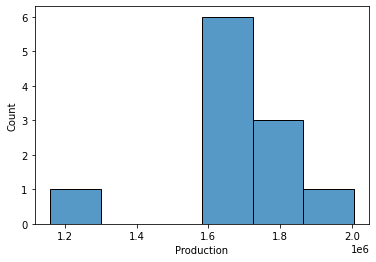

In [573]:
sns.histplot(y_train[y_train.index.str[5:]=='80'])

# Essai de prediction d'une année pourrie

In [353]:
full_df['year'] = full_df.index.astype(str).str[:4]

In [354]:
df_2016=full_df[full_df['year']=='2016']

In [500]:
df_2016

,Agriculteur,Production,RatioSep,RatioOct,Prix_matos,Prod_n-1,tmax_c 01,tmax_c 02,tmax_c 03,tmax_c 04,...,dpt_86,dpt_87,dpt_88,dpt_89,dpt_9,dpt_90,dpt_91,dpt_93,dpt_94,dpt_95
2016-1,2293.504834,206530.0,1.02,1.03681,96.525,242910.0,7.0,5.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2016-2,2840.275814,984250.0,1.02,1.03681,96.525,1793629.5,6.0,6.0,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2016-3,3432.712261,283560.0,1.02,1.03681,96.525,306460.0,4.0,3.0,4.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2016-4,1348.743951,9424.7,1.02,1.03681,96.525,9727.0,6.0,5.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2016-5,1188.331678,14586.1,1.02,1.03681,96.525,15085.7,4.0,4.0,5.0,7.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-91,478.649154,150885.0,1.02,1.03681,96.525,286184.0,5.0,3.0,7.0,3.0,...,0,0,0,0,0,0,1,0,0,0
2016-93,63.923775,1950.0,1.02,1.03681,96.525,3094.0,6.0,10.0,8.0,8.0,...,0,0,0,0,0,0,0,1,0,0
2016-94,57.523212,2092.5,1.02,1.03681,96.525,4191.5,5.0,8.0,7.0,3.0,...,0,0,0,0,0,0,0,0,1,0
2016-95,312.441936,123550.0,1.02,1.03681,96.525,229547.5,4.0,7.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0,1


In [356]:
df_2016=df_2016.drop(columns=['Production','year'])
full_df=full_df.drop(columns=['year'])

In [360]:
pipe.predict(df_2016).sum()

28421922.195501875

La prod de l'année 2016 n'est retrouvé qu'avec un modèle qui prend toutes les features. Il faut pouvoir cross valider nos données. On va essayer la meme chose avec 'Prod_n-1' en moins pour ne pas dataleak

In [391]:
ensemble = StackingRegressor(
    estimators = [
                ("LineReg", LinearRegression()),
                  ("XGB", XGBRegressor())],
    final_estimator = LinearRegression())
pipe=Pipeline([('Scaler',RobustScaler()),
     ('model',LinearRegression())])

In [392]:
X_test=full_df.drop(columns=['Production','Prod_n-1'])
#X_test=full_df[['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_test=full_df['Production']
X_train=full_df.drop(columns=['Production','Prod_n-1'])
#X_train=full_df[['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_train=full_df['Production']

In [393]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Scaler', RobustScaler()), ('model', LinearRegression())])

In [394]:
mean_absolute_error(y_test,pipe.predict(X_test))

34730.96242450755

In [395]:
pipe.predict(df_2016.drop(columns=['Prod_n-1'])).sum()

27978566.96977174

Tentative de crossval

In [396]:
from sklearn.model_selection import cross_validate

In [405]:
cross_validate(pipe,full_df.drop(columns=['Production','Prod_n-1']),full_df['Production'],scoring='neg_mean_absolute_error',cv=5)['test_score'].mean()

-92092.80207687189

In [407]:
np.mean([ -72296.8126435 ,  -80213.40739272, -108754.32674369,
         -89806.27696637, -148066.12479889])

-99827.389709034

In [408]:
pipe=Pipeline([('Scaler',RobustScaler()),
     ('model',LinearRegression())])

In [410]:
pipe.fit(full_df.drop(columns=['Production','Prod_n-1']),full_df['Production'])

Pipeline(steps=[('Scaler', RobustScaler()), ('model', LinearRegression())])

In [418]:
X_pred=X_pred[full_df.drop(columns=['Production']).columns]
X_pred=X_pred.drop(columns=['Prod_n-1'])

In [419]:
pipe.predict(X_pred).sum()

43556722.10126713

# Recherche des best features avec cross val

In [431]:
df_ohe=full_df.iloc[:,124:] #Reset du df_ohe
df_ohe['Production']=full_df['Production']

In [575]:
pipe=build_model('linear_reg')

In [433]:
cross_validate(pipe,df_ohe.drop(columns=['Production']),df_ohe['Production'],scoring='neg_mean_absolute_error',cv=5)['test_score'].mean()

-41722.330230407824

In [587]:
for i in range(5,11):
    print(cross_validate(pipe,full_df.drop(columns=['Production','Prod_n-1']),full_df['Production'],scoring='neg_mean_absolute_error',cv=i)['test_score'].mean())

-92092.80207687189
-121650.2046007887
-74289.48554067363
-82081.28766628997
-76008.2536800311
-59063.16865318599


In [588]:
full_df

,Agriculteur,Production,RatioSep,RatioOct,Prix_matos,Prod_n-1,tmax_c 01,tmax_c 02,tmax_c 03,tmax_c 04,...,dpt_86,dpt_87,dpt_88,dpt_89,dpt_9,dpt_90,dpt_91,dpt_93,dpt_94,dpt_95
2010-1,2820.041792,239640.3,1.229426,1.255319,92.741667,189200.0,7.0,5.0,7.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2010-2,3563.698886,1485134.7,1.229426,1.255319,92.741667,1562314.0,4.0,6.0,7.0,6.0,...,0,0,0,0,0,0,0,0,0,0
2010-3,4276.654443,307450.0,1.229426,1.255319,92.741667,290360.0,6.0,5.0,9.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2010-4,1462.803043,6233.7,1.229426,1.255319,92.741667,7322.0,3.0,6.0,6.0,8.0,...,0,0,0,0,0,0,0,0,0,0
2010-5,1406.337173,9753.9,1.229426,1.255319,92.741667,10065.5,3.0,5.0,4.0,6.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-91,422.282609,243243.0,1.104197,1.072703,89.891667,191952.0,6.0,4.0,4.0,4.0,...,0,0,0,0,0,0,1,0,0,0
2021-93,80.734902,2739.0,1.104197,1.072703,89.891667,2535.0,14.0,6.0,8.0,14.0,...,0,0,0,0,0,0,0,1,0,0
2021-94,65.237675,3483.0,1.104197,1.072703,89.891667,2052.0,5.0,4.0,4.0,4.0,...,0,0,0,0,0,0,0,0,1,0
2021-95,213.709486,198121.0,1.104197,1.072703,89.891667,165516.0,8.0,5.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0,1


In [434]:
best_score=-41722.330230407824
for name in full_df.columns:
    print('Test de ' + name)
    if name in df_ohe.columns:
        pass
    else :
        df_ohe[name]=full_df[name]
    
        pipe=build_model('linear_reg')
        pipe.fit(X,y)
        score_pred=cross_validate(pipe,df_ohe.drop(columns=['Production']),df_ohe['Production'],scoring='neg_mean_absolute_error',cv=5)['test_score'].mean()
        if score_pred>best_score:
            best_score=score_pred
            print(best_score,name)
        else :
            df_ohe=df_ohe.drop(columns=[name])
        print(best_score)

Test de Agriculteur
Test de Production
Test de RatioSep
Test de RatioOct
Test de Prix_matos
Test de Prod_n-1
Test de tmax_c 01
Test de tmax_c 02
Test de tmax_c 03
Test de tmax_c 04
Test de tmax_c 05
Test de tmax_c 09_n-1
Test de tmax_c 10_n-1
Test de tmax_c 11_n-1
Test de tmax_c 12_n-1
Test de tmin_c 01
Test de tmin_c 02
Test de tmin_c 03
Test de tmin_c 04
Test de tmin_c 05
Test de tmin_c 09_n-1
Test de tmin_c 10_n-1
Test de tmin_c 11_n-1
Test de tmin_c 12_n-1
Test de windspeed_max 01
Test de windspeed_max 02
Test de windspeed_max 03
Test de windspeed_max 04
Test de windspeed_max 05
Test de windspeed_max 09_n-1
Test de windspeed_max 10_n-1
Test de windspeed_max 11_n-1
Test de windspeed_max 12_n-1
Test de rain_mm 01
Test de rain_mm 02
Test de rain_mm 03
Test de rain_mm 04
Test de rain_mm 05
Test de rain_mm 09_n-1
Test de rain_mm 10_n-1
Test de rain_mm 11_n-1
Test de rain_mm 12_n-1
Test de humidity_pct 01
Test de humidity_pct 02
Test de humidity_pct 03
Test de humidity_pct 04
Test de hum

In [435]:
best_score

-41719.996729373655

In [437]:
list(df_ohe.columns)

['dpt_10',
 'dpt_11',
 'dpt_12',
 'dpt_13',
 'dpt_14',
 'dpt_15',
 'dpt_16',
 'dpt_17',
 'dpt_18',
 'dpt_19',
 'dpt_2',
 'dpt_20',
 'dpt_21',
 'dpt_22',
 'dpt_23',
 'dpt_24',
 'dpt_25',
 'dpt_26',
 'dpt_27',
 'dpt_28',
 'dpt_29',
 'dpt_3',
 'dpt_30',
 'dpt_31',
 'dpt_32',
 'dpt_33',
 'dpt_34',
 'dpt_35',
 'dpt_36',
 'dpt_37',
 'dpt_38',
 'dpt_39',
 'dpt_4',
 'dpt_40',
 'dpt_41',
 'dpt_42',
 'dpt_43',
 'dpt_44',
 'dpt_45',
 'dpt_46',
 'dpt_47',
 'dpt_48',
 'dpt_49',
 'dpt_5',
 'dpt_50',
 'dpt_51',
 'dpt_52',
 'dpt_53',
 'dpt_54',
 'dpt_55',
 'dpt_56',
 'dpt_57',
 'dpt_58',
 'dpt_59',
 'dpt_6',
 'dpt_60',
 'dpt_61',
 'dpt_62',
 'dpt_63',
 'dpt_64',
 'dpt_65',
 'dpt_66',
 'dpt_67',
 'dpt_68',
 'dpt_69',
 'dpt_7',
 'dpt_70',
 'dpt_71',
 'dpt_72',
 'dpt_73',
 'dpt_74',
 'dpt_76',
 'dpt_77',
 'dpt_78',
 'dpt_79',
 'dpt_8',
 'dpt_80',
 'dpt_81',
 'dpt_82',
 'dpt_83',
 'dpt_84',
 'dpt_85',
 'dpt_86',
 'dpt_87',
 'dpt_88',
 'dpt_89',
 'dpt_9',
 'dpt_90',
 'dpt_91',
 'dpt_93',
 'dpt_94',
 'dpt_9

# Test de Maitre Zhou

In [438]:
feature_zhou=['dpt_10','dpt_11','dpt_12','dpt_13','dpt_14','dpt_15','dpt_16','dpt_17','dpt_18','dpt_19','dpt_2','dpt_20','dpt_21','dpt_22','dpt_23',
              'dpt_24','dpt_25','dpt_26','dpt_27','dpt_28','dpt_29','dpt_3','dpt_30','dpt_31','dpt_32','dpt_33','dpt_34','dpt_35','dpt_36','dpt_37',
              'dpt_38','dpt_39','dpt_4','dpt_40','dpt_41','dpt_42','dpt_43','dpt_44','dpt_45','dpt_46','dpt_47','dpt_48','dpt_49','dpt_5','dpt_50',
              'dpt_51','dpt_52','dpt_53','dpt_54','dpt_55','dpt_56','dpt_57','dpt_58','dpt_59','dpt_6','dpt_60','dpt_61','dpt_62','dpt_63','dpt_64',
              'dpt_65','dpt_66','dpt_67','dpt_68','dpt_69','dpt_7','dpt_70','dpt_71','dpt_72','dpt_73','dpt_74','dpt_76','dpt_77','dpt_78','dpt_79',
              'dpt_8','dpt_80','dpt_81','dpt_82','dpt_83','dpt_84','dpt_85','dpt_86','dpt_87','dpt_88','dpt_89','dpt_9','dpt_90','dpt_91','dpt_93',
              'dpt_94','dpt_95','Production','tmax_c 10_n-1','tmin_c 05','pressuremax_mb 10_n-1','snow_mm 04','snow_mm 05','snow_mm 11_n-1',
             'RatioSep','Prix_matos','windspeed_max 04', 'rain_mm 04', 'humidity_pct 03', 'humidity_pct 10_n-1', 'pressuremax_mb 04', 'pressuremax_mb 09_n-1',
              'cloudcov_avg_pct 04', 'cloudcov_avg_pct 10_n-1', 'snow_mm 10_n-1', 'snow_mm 12_n-1', 'uv_idx 02', 'uv_idx 05', 'sunhour 03', 'tmax_deg 10_n-1']
df_zhou=full_df[feature_zhou].copy()

In [439]:
df_zhou

,dpt_10,dpt_11,dpt_12,dpt_13,dpt_14,dpt_15,dpt_16,dpt_17,dpt_18,dpt_19,...,pressuremax_mb 04,pressuremax_mb 09_n-1,cloudcov_avg_pct 04,cloudcov_avg_pct 10_n-1,snow_mm 10_n-1,snow_mm 12_n-1,uv_idx 02,uv_idx 05,sunhour 03,tmax_deg 10_n-1
2010-1,0,0,0,0,0,0,0,0,0,0,...,1020.666667,1021.733333,32.812500,33.612903,0.0,16.6,1.428571,3.451613,9.532258,26.0
2010-2,0,0,0,0,0,0,0,0,0,0,...,1021.900000,1023.000000,30.708333,47.395161,0.0,9.9,1.642857,3.419355,9.467742,20.0
2010-3,0,0,0,0,0,0,0,0,0,0,...,1021.100000,1022.033333,32.979167,29.895161,0.0,15.2,1.678571,3.483871,9.741935,29.0
2010-4,0,0,0,0,0,0,0,0,0,0,...,1018.966667,1019.433333,27.291667,17.552419,0.0,5.5,1.500000,3.483871,10.506452,23.0
2010-5,0,0,0,0,0,0,0,0,0,0,...,1019.333333,1020.033333,33.029167,18.475806,0.5,17.5,1.285714,2.870968,9.777419,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-91,0,0,0,0,0,0,0,0,0,0,...,1022.400000,1018.300000,37.116667,68.814516,0.0,3.5,2.678571,3.548387,9.254839,21.0
2021-93,0,0,0,0,0,0,0,0,0,0,...,1017.000000,1017.066667,42.283333,28.858871,0.0,0.0,3.500000,4.806452,10.883871,21.0
2021-94,0,0,0,0,0,0,0,0,0,0,...,1022.500000,1018.333333,38.179167,69.169355,0.0,4.7,2.607143,3.548387,9.080645,21.0
2021-95,0,0,0,0,0,0,0,0,0,0,...,1023.000000,1018.333333,38.662500,72.717742,0.0,2.0,2.607143,3.612903,8.925806,19.0


In [440]:
X=df_zhou[:-93].drop(columns=['Production'])
X_test=df_zhou.iloc[-93:].drop(columns=['Production'])
y=df_zhou[:-93]['Production']
y_test=df_zhou.iloc[-93:]['Production']


ensemble = StackingRegressor(
    estimators = [
                ("LineReg", LinearRegression()),
                  ("XGB", XGBRegressor())],
    final_estimator = LinearRegression())
pipe=Pipeline([('Scaler',RobustScaler()),
     ('Stacking',ensemble)])
pipe.fit(X,y)

Pipeline(steps=[('Scaler', RobustScaler()),
                ('Stacking',
                 StackingRegressor(estimators=[('LineReg', LinearRegression()),
                                               ('XGB',
                                                XGBRegressor(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             enable_categorical=False,
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=None,
                                                             scale_pos_weight=None,
                                                             subsample=None,
                                                             tree_method=None,
                                                             validate_parameters=None,
                                                             verbosity=None))],
                                   final_estimator=LinearRegression()))])

In [441]:
mean_absolute_error(y_test,pipe.predict(X_test))

58319.061431052214

# Essai de holdout de 2015 et 2016 qui sont la meilleure année et la pire 

In [447]:
full_df['year']=full_df.index.str[:4]

In [457]:
df_2015=full_df[full_df['year']=='2015']
df_2016=full_df[full_df['year']=='2016']
df_train=full_df[full_df['year']!='2015']
df_train=df_train[df_train['year']!='2016']
df_train=df_train.drop(columns=['year'])
df_2015=df_2015.drop(columns=['year'])
df_2016=df_2016.drop(columns=['year'])

In [471]:
ensemble = StackingRegressor(
                            estimators = [
                                        ("LineReg", LinearRegression()),
                                        ("XGB", XGBRegressor())],
                            final_estimator = LinearRegression())
pipe=Pipeline([('Scaler',RobustScaler()),
     ('Stacking',ensemble)])
pipe.fit(df_train.drop(columns=['Production','Prod_n-1']),df_train['Production'])

Pipeline(steps=[('Scaler', RobustScaler()),
                ('Stacking',
                 StackingRegressor(estimators=[('LineReg', LinearRegression()),
                                               ('XGB',
                                                XGBRegressor(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             enable_categorical=False,
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=None,
                                                             scale_pos_weight=None,
                                                             subsample=None,
                                                             tree_method=None,
                                                             validate_parameters=None,
                                                             verbosity=None))],
                                   final_estimator=LinearRegression()))])

In [474]:
mean_absolute_error(df_2015['Production'],pipe.predict(df_2015.drop(columns=['Production','Prod_n-1'])))

139457.9228630925

In [498]:
pred_2015=pd.DataFrame(pipe.predict(df_2015.drop(columns=['Production','Prod_n-1'])),index=df_2015.index)

In [476]:
mean_absolute_error(df_2016['Production'],pipe.predict(df_2016.drop(columns=['Production','Prod_n-1'])))

90754.73768380465

In [485]:
pred_2016=pd.DataFrame(pipe.predict(df_2016.drop(columns=['Production','Prod_n-1'])),index=df_2016.index)

In [499]:
pred_2015

,0
2015-1,4.341884e+05
2015-2,1.674976e+06
2015-3,4.748039e+05
2015-4,1.739037e+05
2015-5,1.324330e+05
...,...
2015-91,4.329144e+05
2015-93,1.820703e+05
2015-94,2.187683e+05
2015-95,3.947632e+05


In [491]:
pred_2016.sort_values(by=0,ascending=False).head(20)

,0
2016-80,1.663984e+06
2016-2,1.506723e+06
2016-62,1.474155e+06
2016-51,1.363156e+06
2016-28,1.250346e+06
2016-60,1.237804e+06
2016-27,1.189584e+06
2016-77,1.045368e+06
2016-59,9.701745e+05
2016-76,9.436405e+05


# Prediction 2022

## Construction du df

In [228]:
df_final=full_df[best_features]

In [229]:
df_final

,dpt_10,dpt_11,dpt_12,dpt_13,dpt_14,dpt_15,dpt_16,dpt_17,dpt_18,dpt_19,...,Production,RatioSep,tmax_c 09_n-1,tmin_c 11_n-1,humidity_pct 03,snow_mm 04,snow_mm 09_n-1,snow_mm 10_n-1,tmax_deg 04,tmin_deg 10_n-1
2010-1,0,0,0,0,0,0,0,0,0,0,...,239640.3,1.229426,5.0,22.0,87.838710,0.0,0.0,0.0,25.0,-3.0
2010-2,0,0,0,0,0,0,0,0,0,0,...,1485134.7,1.229426,4.0,25.0,88.096774,0.0,0.0,0.0,24.0,0.0
2010-3,0,0,0,0,0,0,0,0,0,0,...,307450.0,1.229426,4.0,24.0,86.580645,0.0,0.0,0.0,26.0,-4.0
2010-4,0,0,0,0,0,0,0,0,0,0,...,6233.7,1.229426,4.0,23.0,84.322581,0.0,0.0,0.0,20.0,-4.0
2010-5,0,0,0,0,0,0,0,0,0,0,...,9753.9,1.229426,8.0,24.0,86.645161,3.4,0.0,0.5,17.0,-11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-91,0,0,0,0,0,0,0,0,0,0,...,243243.0,1.104197,4.0,25.0,80.193548,0.3,0.0,0.0,24.0,7.0
2021-93,0,0,0,0,0,0,0,0,0,0,...,2739.0,1.104197,10.0,54.0,69.838710,0.0,0.0,0.0,19.0,10.0
2021-94,0,0,0,0,0,0,0,0,0,0,...,3483.0,1.104197,4.0,24.0,76.677419,0.7,0.0,0.0,24.0,8.0
2021-95,0,0,0,0,0,0,0,0,0,0,...,198121.0,1.104197,4.0,26.0,80.322581,2.8,0.0,0.0,23.0,7.0


## Get X_pred et organisation des colonnes

In [413]:
X_pred=get_X_pred(agg_type='M')

/Users/constantintalandier/code/Constantier/deepagri/deepagri/meteo_agg.py:127: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  df_agg.loc[:, idx[:,cols_to_shift]] = (df_agg.loc[:, idx[:,cols_to_shift]]
/Users/constantintalandier/code/Constantier/deepagri/deepagri/meteo_agg.py:127: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  df_agg.loc[:, idx[:,cols_to_shift]] = (df_agg.loc[:, idx[:,cols_to_shift]]
/Users/constantintalandier/.pyenv/ve

In [233]:
X_pred=X_pred[df_final.drop(columns=['Production']).columns]

In [234]:
X_pred

,dpt_10,dpt_11,dpt_12,dpt_13,dpt_14,dpt_15,dpt_16,dpt_17,dpt_18,dpt_19,...,dpt_95,RatioSep,tmax_c 09_n-1,tmin_c 11_n-1,humidity_pct 03,snow_mm 04,snow_mm 09_n-1,snow_mm 10_n-1,tmax_deg 04,tmin_deg 10_n-1
2022-1,0,0,0,0,0,0,0,0,0,0,...,0,1.091368,4.0,24.0,89.709677,4.4,0.0,0.0,22.0,2.0
2022-10,1,0,0,0,0,0,0,0,0,0,...,0,1.091368,5.0,26.0,87.870968,0.7,0.0,0.0,21.0,5.0
2022-11,0,1,0,0,0,0,0,0,0,0,...,0,1.091368,2.0,27.0,86.290323,0.0,0.0,0.0,21.0,3.0
2022-12,0,0,1,0,0,0,0,0,0,0,...,0,1.091368,3.0,24.0,89.161290,0.1,0.0,0.0,21.0,1.0
2022-13,0,0,0,1,0,0,0,0,0,0,...,0,1.091368,1.0,23.0,67.096774,0.0,0.0,0.0,19.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-90,0,0,0,0,0,0,0,0,0,0,...,0,1.091368,3.0,27.0,86.322581,13.9,0.0,0.0,22.0,2.0
2022-91,0,0,0,0,0,0,0,0,0,0,...,0,1.091368,4.0,25.0,80.193548,0.3,0.0,0.0,24.0,7.0
2022-93,0,0,0,0,0,0,0,0,0,0,...,0,1.091368,10.0,54.0,69.838710,0.0,0.0,0.0,19.0,10.0
2022-94,0,0,0,0,0,0,0,0,0,0,...,0,1.091368,4.0,24.0,76.677419,0.7,0.0,0.0,24.0,8.0


## Sans 2021 dans le fit

In [235]:
X=df_final[:-93].drop(columns=['Production'])
X_test=df_final.iloc[-93:].drop(columns=['Production'])
y=df_final[:-93]['Production']
y_test=df_final.iloc[-93:]['Production']
model=build_model(model='linear_reg')
model=fit_model(model,X,y)

In [236]:
model.predict(X_pred).sum()

35289969.8295509

## Avec 2021 dans le fit

In [237]:
X=df_final.drop(columns=['Production'])
X_test=df_final.drop(columns=['Production'])
y=df_final['Production']
y_test=df_final['Production']
model=build_model(model='linear_reg')
model=fit_model(model,X,y)

In [238]:
model.predict(X_pred).sum()

35326015.40026926

# Passage au rendement

In [336]:
full_df=get_df_full(agg_type='M',ohe='prod_cluster')

/Users/constantintalandier/code/Constantier/deepagri/deepagri/meteo_agg.py:127: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  df_agg.loc[:, idx[:,cols_to_shift]] = (df_agg.loc[:, idx[:,cols_to_shift]]
/Users/constantintalandier/code/Constantier/deepagri/deepagri/meteo_agg.py:127: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  df_agg.loc[:, idx[:,cols_to_shift]] = (df_agg.loc[:, idx[:,cols_to_shift]]
/Users/constantintalandier/.pyenv/ve

In [340]:
full_df.loc['2010-18',['Rend_n-1','rendement']]

Rend_n-1     66.990068
rendement    63.992713
Name: 2010-18, dtype: object

In [325]:
full_df[full_df.index=="2012-20"]

,Agriculteur,rendement,RatioSep,RatioOct,Prix_matos,Rend_n-1,tmax_c 01,tmax_c 02,tmax_c 03,tmax_c 04,...,tmin_deg 10_n-1,tmin_deg 11_n-1,tmin_deg 12_n-1,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,year,dep
2012-20,1773.424571,59.0,1.019069,0.981579,98.083333,30.0,7.0,8.0,2.0,4.0,...,7.0,4.0,0.0,1,0,0,0,0,2012,20


In [83]:
list(full_df.columns)

['Agriculteur',
 'rendement',
 'RatioSep',
 'RatioOct',
 'Prix_matos',
 'Rend_n-1',
 'tmax_c 01',
 'tmax_c 02',
 'tmax_c 03',
 'tmax_c 04',
 'tmax_c 05',
 'tmax_c 09_n-1',
 'tmax_c 10_n-1',
 'tmax_c 11_n-1',
 'tmax_c 12_n-1',
 'tmin_c 01',
 'tmin_c 02',
 'tmin_c 03',
 'tmin_c 04',
 'tmin_c 05',
 'tmin_c 09_n-1',
 'tmin_c 10_n-1',
 'tmin_c 11_n-1',
 'tmin_c 12_n-1',
 'windspeed_max 01',
 'windspeed_max 02',
 'windspeed_max 03',
 'windspeed_max 04',
 'windspeed_max 05',
 'windspeed_max 09_n-1',
 'windspeed_max 10_n-1',
 'windspeed_max 11_n-1',
 'windspeed_max 12_n-1',
 'rain_mm 01',
 'rain_mm 02',
 'rain_mm 03',
 'rain_mm 04',
 'rain_mm 05',
 'rain_mm 09_n-1',
 'rain_mm 10_n-1',
 'rain_mm 11_n-1',
 'rain_mm 12_n-1',
 'humidity_pct 01',
 'humidity_pct 02',
 'humidity_pct 03',
 'humidity_pct 04',
 'humidity_pct 05',
 'humidity_pct 09_n-1',
 'humidity_pct 10_n-1',
 'humidity_pct 11_n-1',
 'humidity_pct 12_n-1',
 'pressuremax_mb 01',
 'pressuremax_mb 02',
 'pressuremax_mb 03',
 'pressuremax_

In [309]:
full_df['Rend_n-1']=full_df['Rend_n-1'].astype('float64')

In [310]:
score=[]
pred=[]
reel=[]

for ligne in range(93*2,1116,93):
    print(ligne,full_df.iloc[ligne].name)
    model=Pipeline([
        
        ('Linear',XGBRegressor(booster='gblinear'))
    ])
    features=['Rend_n-1']
    '''features=['cluster_0','cluster_1','cluster_2','cluster_3','cluster_4','windspeed_max 01',
 'windspeed_max 09_n-1',
 'windspeed_max 10_n-1',
 'windspeed_max 11_n-1',
 'windspeed_max 12_n-1','dewmax_c 04','dewmax_c 11_n-1','tmax_deg 09_n-1','tmax_deg 04','tmax_deg 05']'''
    
    X_train=full_df.iloc[:ligne][features]
    #X_train['windspeed_max 01']=-X_train['windspeed_max 01']
    y_train=full_df.iloc[:ligne]['rendement']
    
    X_test=full_df.iloc[ligne:ligne+93][features]
    y_test=full_df.iloc[ligne:ligne+93]['rendement']
    
    model.fit(X_train,y_train)
    pred.append(model.predict(X_test))
    reel.append(y_test)
    score.append(mean_absolute_error(y_test,pred[-1]))

pred=np.array(pred)
reel=np.array(reel)
np.mean(score)


186 2012-1
279 2013-1
372 2014-1
465 2015-1


/Users/constantintalandier/.pyenv/versions/3.8.12/envs/deepagri/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/constantintalandier/.pyenv/versions/3.8.12/envs/deepagri/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/constantintalandier/.pyenv/versions/3.8.12/envs/deepagri/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/

558 2016-1
651 2017-1
744 2018-1
837 2019-1


/Users/constantintalandier/.pyenv/versions/3.8.12/envs/deepagri/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/constantintalandier/.pyenv/versions/3.8.12/envs/deepagri/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/constantintalandier/.pyenv/versions/3.8.12/envs/deepagri/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/

930 2020-1
1023 2021-1


/Users/constantintalandier/.pyenv/versions/3.8.12/envs/deepagri/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/constantintalandier/.pyenv/versions/3.8.12/envs/deepagri/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


9.828265662652544

In [312]:
model.steps[0][1].intercept_

array([24.6248])

In [313]:
model.steps[0][1].coef_

array([0.594631])

In [317]:
mean_absolute_error(full_df['rendement'], full_df['Rend_n-1'])

9.351234756350767

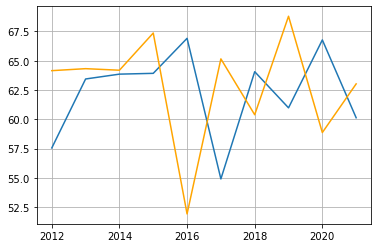

In [314]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')
plt.grid()

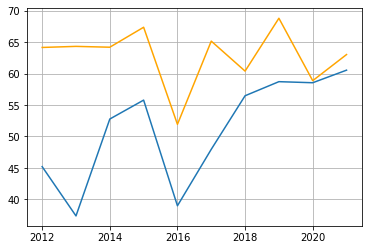

In [268]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')
plt.grid()

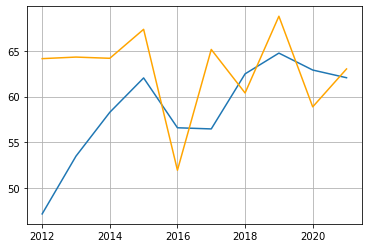

In [250]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')
plt.grid()

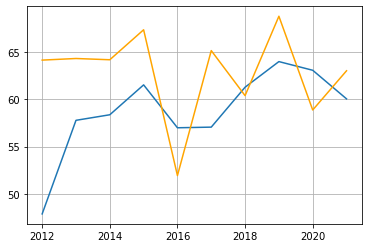

In [233]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')
plt.grid()

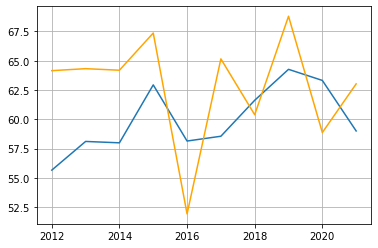

In [229]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')
plt.grid()

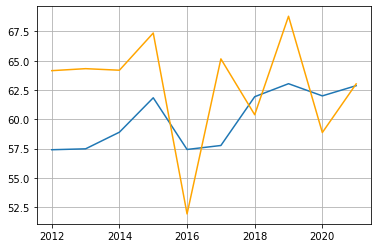

In [221]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')
plt.grid()

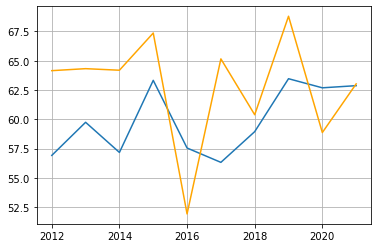

In [219]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')
plt.grid()

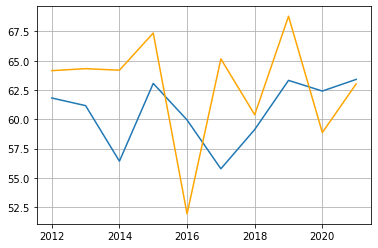

In [217]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')
plt.grid()

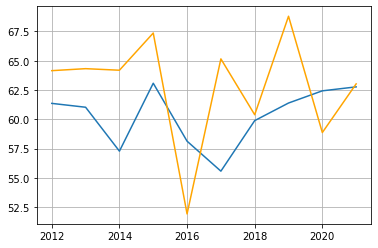

In [213]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')
plt.grid()

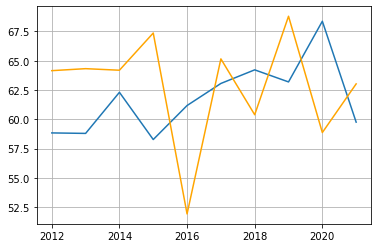

In [211]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')
plt.grid()

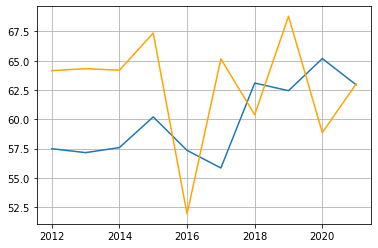

In [209]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')
plt.grid()

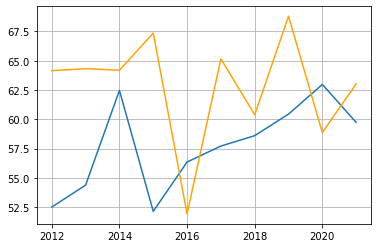

In [205]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')
plt.grid()

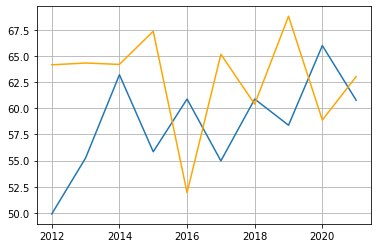

In [203]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')
plt.grid()

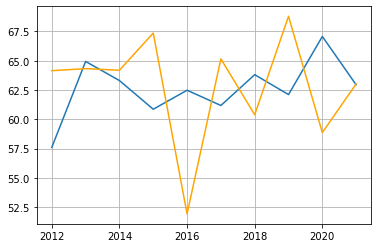

In [190]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')
plt.grid()

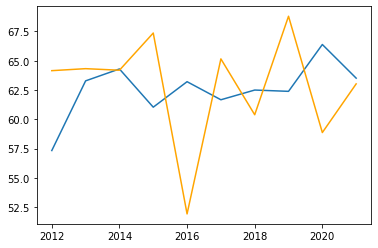

In [173]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')

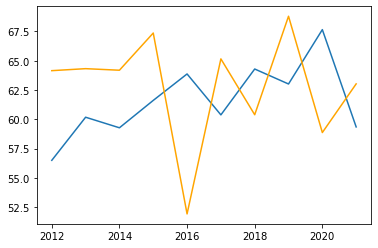

In [171]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')

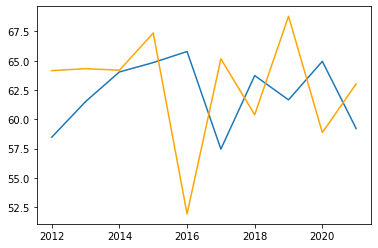

In [138]:
index_plot=list(range(2012,2022))
plt.plot(index_plot,pred.mean(axis=1))
plt.plot(index_plot,reel.mean(axis=1),c='orange')

## Recherche des paramètres qui expliquent le mieux l'année 2016

### Par graph

In [277]:
full_df['year']=full_df.index.str[:4]

In [278]:
full_df['dep']=full_df.index.str[5:]

In [279]:
full_df

,Agriculteur,rendement,RatioSep,RatioOct,Prix_matos,Rend_n-1,tmax_c 01,tmax_c 02,tmax_c 03,tmax_c 04,...,tmin_deg 10_n-1,tmin_deg 11_n-1,tmin_deg 12_n-1,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,year,dep
2010-1,2820.041792,71.964054,1.229426,1.255319,92.741667,69.712601,7.0,5.0,7.0,5.0,...,-3.0,2.0,-9.0,0,1,0,0,0,2010,1
2010-2,3563.698886,83.68559,1.229426,1.255319,92.741667,89.977942,4.0,6.0,7.0,6.0,...,0.0,3.0,-8.0,0,0,0,0,1,2010,2
2010-3,4276.654443,65.0,1.229426,1.255319,92.741667,68.0,6.0,5.0,9.0,4.0,...,-4.0,0.0,-7.0,0,1,0,0,0,2010,3
2010-4,1462.803043,33.0,1.229426,1.255319,92.741667,35.0,3.0,6.0,6.0,8.0,...,-4.0,-2.0,-12.0,1,0,0,0,0,2010,4
2010-5,1406.337173,41.0,1.229426,1.255319,92.741667,41.0,3.0,5.0,4.0,6.0,...,-11.0,-9.0,-21.0,1,0,0,0,0,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-91,422.282609,81.0,1.104197,1.072703,89.891667,72.0,6.0,4.0,4.0,4.0,...,7.0,3.0,2.0,0,1,0,0,0,2021,91
2021-93,80.734902,83.0,1.104197,1.072703,89.891667,78.0,14.0,6.0,8.0,14.0,...,10.0,6.0,6.0,1,0,0,0,0,2021,93
2021-94,65.237675,81.0,1.104197,1.072703,89.891667,72.0,5.0,4.0,4.0,4.0,...,8.0,4.0,2.0,1,0,0,0,0,2021,94
2021-95,213.709486,83.0,1.104197,1.072703,89.891667,78.0,8.0,5.0,4.0,4.0,...,7.0,3.0,-1.0,0,1,0,0,0,2021,95


In [127]:
df_plot=full_df.groupby(by='year').agg(['mean'])

In [163]:
full_df=full_df.drop(columns=['year','dep'])

In [129]:
df_plot.columns = list(map(''.join, df_plot.columns.values))

In [130]:
df_plot.iloc[:,0]

year
2010    3732.889866
2011    3580.205159
2012    3427.520451
2013    3274.835744
2014    3172.467965
2015    3070.100186
2016    2967.732407
2017    2865.364628
2018    2762.996849
2019    2660.629070
2020    2558.261290
2021    2455.893511
Name: Agriculteurmean, dtype: float64

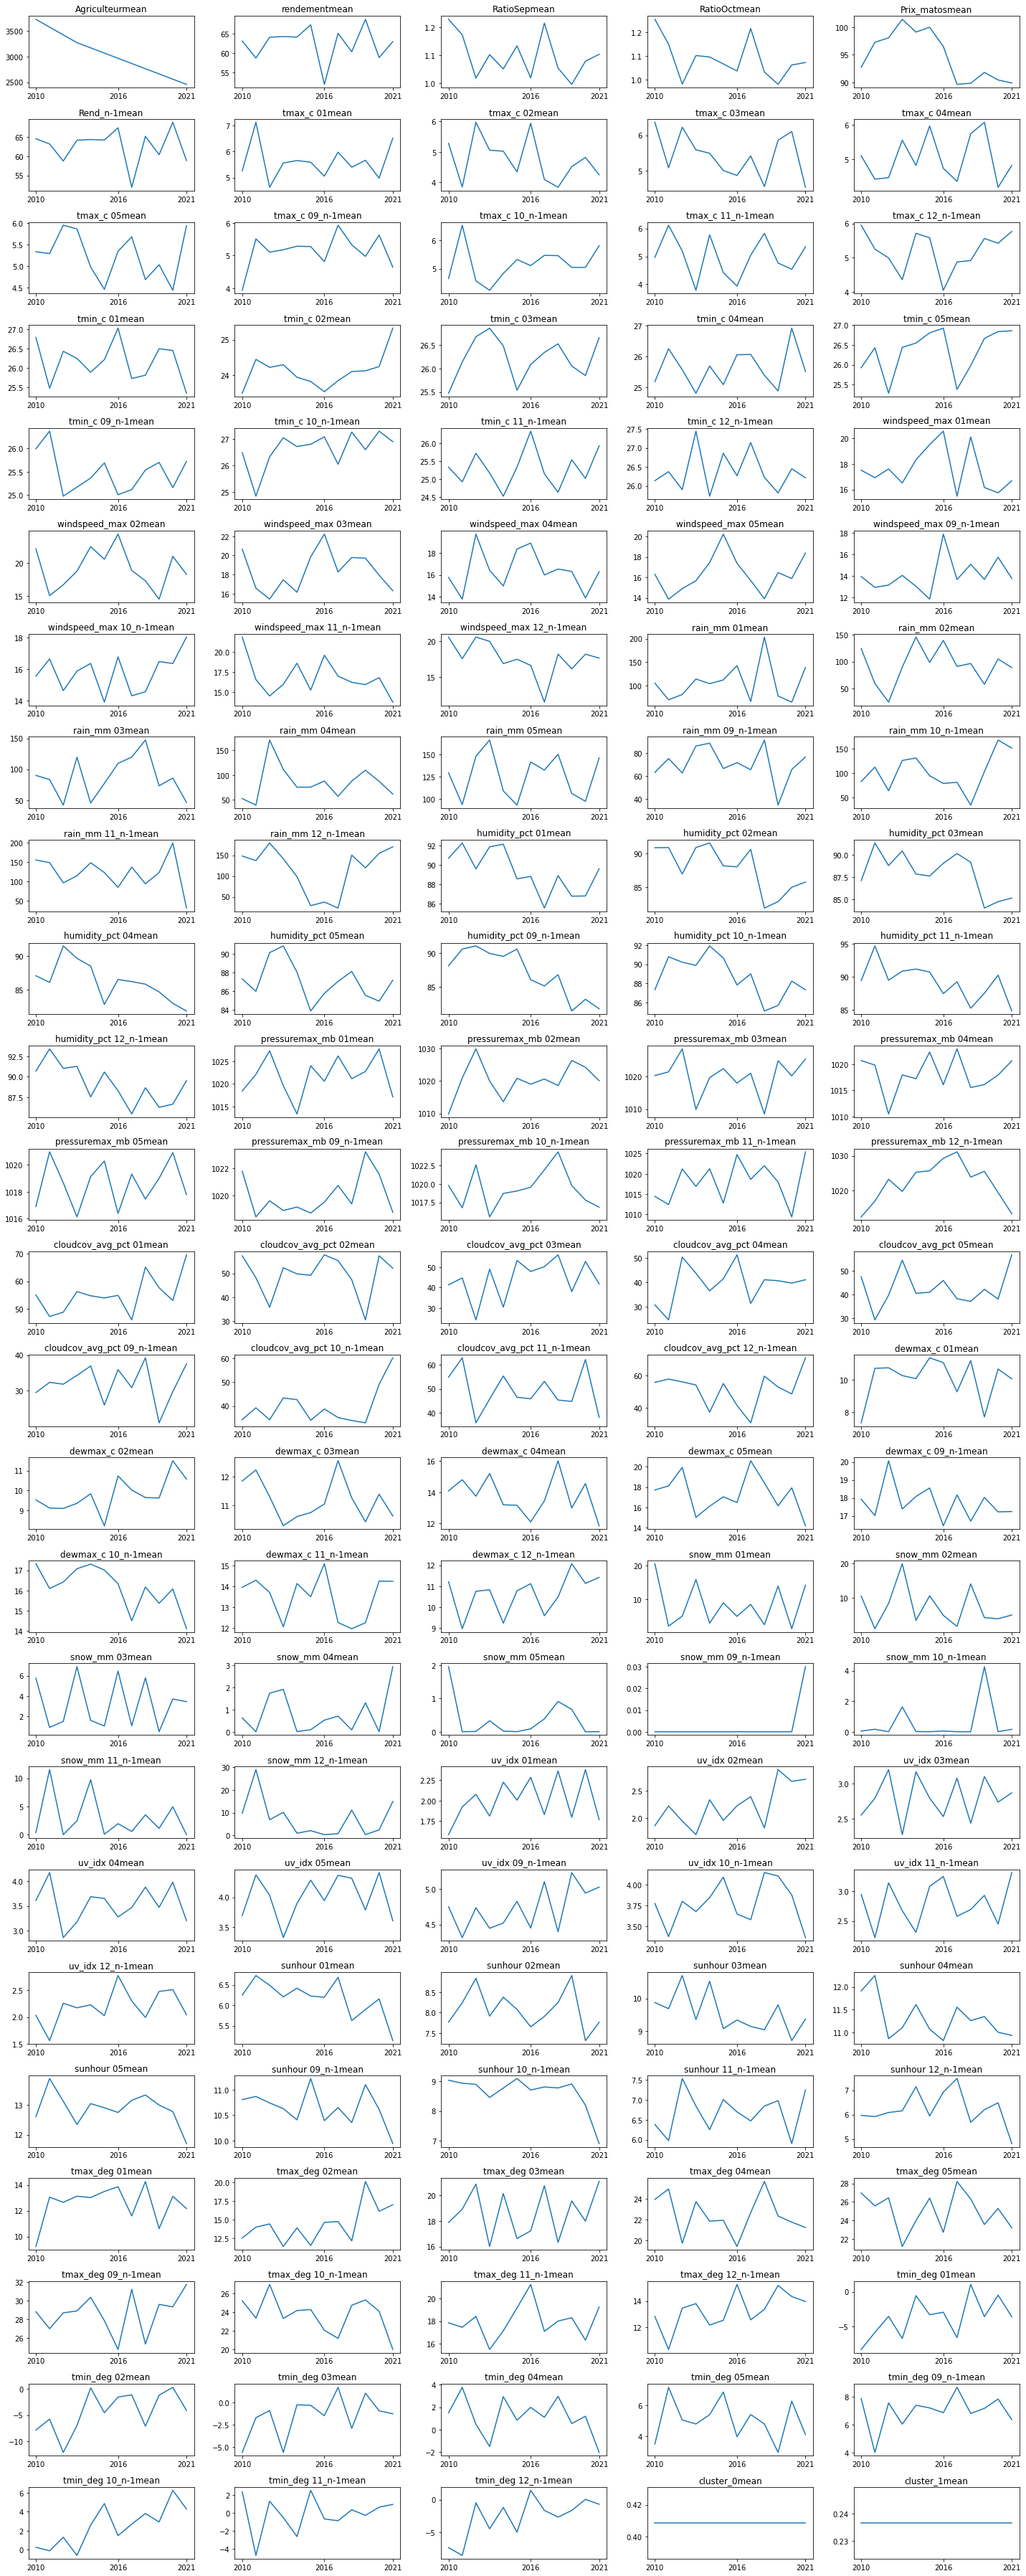

In [134]:
fig,axs=plt.subplots(25,5,figsize=(20,50))
count=0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        axs[i][j].plot(df_plot.iloc[:,count])
        axs[i][j].set_title(df_plot.columns[count])
        axs[i][j].set_xticks(['2010','2016','2021'])
        count+=1
plt.tight_layout()

### Par std

In [114]:
df_plot['Rend_n-1sum']=df_plot['Rend_n-1sum'].astype('float64')
df_plot['rendementsum']=df_plot['rendementsum'].astype('float64')

In [122]:
for i in df_plot.columns:
    if df_plot[i].dtype!='object':
        if df_plot.loc['2016',i]<df_plot[i].mean()+df_plot[i].std():
            print('inf',i)
        elif df_plot.loc['2016',i]>df_plot[i].mean()+df_plot[i].std():
            print('sup',i)

inf Agriculteursum
inf Agriculteurmean
inf rendementsum
inf rendementmean
inf RatioSepsum
inf RatioSepmean
inf RatioOctsum
inf RatioOctmean
inf Prix_matossum
inf Prix_matosmean
sup Rend_n-1sum
sup Rend_n-1mean
inf tmax_c 01sum
inf tmax_c 01mean
sup tmax_c 02sum
sup tmax_c 02mean
inf tmax_c 03sum
inf tmax_c 03mean
inf tmax_c 04sum
inf tmax_c 04mean
inf tmax_c 05sum
inf tmax_c 05mean
inf tmax_c 09_n-1sum
inf tmax_c 09_n-1mean
inf tmax_c 10_n-1sum
inf tmax_c 10_n-1mean
inf tmax_c 11_n-1sum
inf tmax_c 11_n-1mean
inf tmax_c 12_n-1sum
inf tmax_c 12_n-1mean
sup tmin_c 01sum
sup tmin_c 01mean
inf tmin_c 02sum
inf tmin_c 02mean
inf tmin_c 03sum
inf tmin_c 03mean
inf tmin_c 04sum
inf tmin_c 04mean
sup tmin_c 05sum
sup tmin_c 05mean
inf tmin_c 09_n-1sum
inf tmin_c 09_n-1mean
inf tmin_c 10_n-1sum
inf tmin_c 10_n-1mean
sup tmin_c 11_n-1sum
sup tmin_c 11_n-1mean
inf tmin_c 12_n-1sum
inf tmin_c 12_n-1mean
sup windspeed_max 01sum
sup windspeed_max 01mean
sup windspeed_max 02sum
sup windspeed_max 02mea

In [121]:
df_plot.loc['2016','Agriculteursum'] 

275999.11382849194

## Cross val du model trouvé

In [269]:
from deepagri.model import cross_val_model

In [274]:
res=cross_val_model(model,X=full_df[features],y=full_df['rendement'])

In [275]:
res

{'2010': (array([64.70564 , 71.09091 , 64.49556 , 52.07905 , 62.355072, 49.76631 ,
         58.81855 , 74.06341 , 63.04115 , 72.36662 , 63.168827, 58.621834,
         48.84042 , 69.305695, 55.993275, 55.398926, 55.117363, 72.52097 ,
         65.1662  , 72.2547  , 65.83612 , 51.669147, 54.440353, 57.413277,
         41.281822, 67.903564, 72.31047 , 55.306873, 44.256348, 62.076977,
         59.452667, 54.89143 , 40.5965  , 50.47875 , 65.45646 , 61.68363 ,
         70.369675, 51.015213, 43.548473, 71.65559 , 58.81855 , 51.088135,
         52.063248, 71.38571 , 66.73176 , 59.204884, 45.6026  , 51.037582,
         61.30962 , 72.18825 , 81.8418  , 61.62103 , 75.01093 , 78.51135 ,
         54.684284, 76.453766, 71.263374, 76.70387 , 73.485825, 73.3538  ,
         75.663895, 70.77584 , 44.658047, 50.005154, 37.39753 , 66.9434  ,
         60.650257, 57.94221 , 80.683975, 76.08473 , 67.14622 , 55.381817,
         58.328224, 57.996433, 66.98059 , 69.872574, 53.50084 , 77.17282 ,
         76.36443

# Export csv différences prod 2021

In [132]:
df_diff=model.predict(X_test)

In [133]:
df_diff['Prod_reel']=y_test

In [134]:
df_diff['Prod_predite']=df_diff['Prod_predite'].round(0)

In [136]:
df_diff['Diff']=abs(df_compare_2021['Prod_reel']-df_compare_2021['Prod_predite'])

In [138]:
df_diff.to_csv('comparaison.csv')